<a href="https://colab.research.google.com/github/DRodriguez615/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



## **1**

In [0]:
# prior belief
P_drunk = 1/1000
# complement of the prior belief
P_non_drunk = 1-P_drunk
# true positive rate
P_pos_given_drunk = 1
# false positive rate
P_pos_given_nondrunk=.08

In [2]:
# the probability that a person is drunk after one positive breathalyzer test is about 1%
numerator = P_pos_given_drunk*P_drunk
denom = (P_pos_given_drunk*P_drunk) + (P_pos_given_nondrunk*P_non_drunk)
posterior = numerator/denom
print(posterior)

0.012357884330202669


In [3]:
# the probability that a person is drunk after two positive breathalyzer tests is 13.5%
P_drunk = posterior
P_non_drunk = 1-P_drunk
# second test
numerator = P_pos_given_drunk*P_drunk
denom = (P_pos_given_drunk*P_drunk) + (P_pos_given_nondrunk*P_non_drunk)
posterior1 = numerator/denom
print(posterior1)

0.13525210993291495


In [0]:
def prob_drunk_use(prob_drunk_prior, false_positive_rate, true_positive_rate, num_tests):
  posterior = prob_drunk_prior
  for test in range(0, num_tests):
    # prior belief
    P_drunk = posterior
    # complement of the prior belief
    P_non_drunk=1-P_drunk
    # true positive rate
    P_pos_given_drunk = 1
    # false positive rate
    P_pos_given_non_drunk = .08
    # theorem
    numerator = P_pos_given_drunk*P_drunk
    denom = (P_pos_given_drunk * P_drunk) + (P_pos_given_non_drunk*P_non_drunk)
    posterior = numerator/denom
  return posterior

In [15]:
prob_drunk_use(1/1000, .08, 1, 3 )

0.6615996951348605

In [14]:
# tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit =4
prob_drunk_use(1/1000, .08, 1, 4 )

0.9606895076105054

# **2**

In [0]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
import pandas as pd
df = pd.read_csv(url, na_values='?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# mean hours per work
s_mean = df['hours-per-week'].mean()
s_mean

40.437455852092995

In [26]:
# Frequentist approach
# using a 95% confidence interval
ci_freq = stats.t.interval(.95, # confidence interval
                           df.shape[0], # length of sample
                           loc = s_mean,  #sample mean
                           scale = stats.sem(df['hours-per-week']) # std error of the mean
                           )
print(ci_freq)

(40.30333636181343, 40.57157534237256)


In [27]:
# Bayesian approach

ci_bayes = stats.bayes_mvs(df['hours-per-week'], alpha=.95)[0][1]
print(ci_bayes)

(40.303343406780165, 40.571568297405825)


(40, 41)

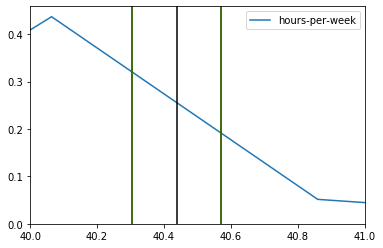

In [47]:
# plotting on graph with kernel density estimate
sns.kdeplot(df['hours-per-week']);
plt.axvline(x=ci_freq[0], color = 'red');
plt.axvline(x=ci_freq[1], color = 'red');
plt.axvline(x=ci_bayes[0], color = 'green');
plt.axvline(x=ci_bayes[1], color = 'green');
plt.axvline(x=s_mean, color = 'k');
plt.xlim(40, 41)

## 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist approaches never uses or gives the probability of a hypothesis( no prior or posterior). Does not require a prior. Depends on the liklihood P(D|H) for both observed and unobserved data. Tends to be less computationally intensive.

Bayesian approaches uses probabilities for both hypothesis and data. Depends on the prior and liklihood of observed data. Requires one to know or construct a 'subjective' prior. May be computationally intensive due to integration over many parameters.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!